In [1]:
import h5py, sys, os, time
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
import spimage

In [3]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [4]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

In [15]:
modes = [1,2,4,6,7,8,9,10,11,12,13,14]

In [35]:
intensities = []
diameter = []
scaling = []
rfits, rdata = [],[]
for m in modes:
    with h5py.File(path_to_aux + '/sucrose/results_%02d.h5' %m, 'r') as f:
        intensities.append(f['intensity'][...] * f['scale'][:] )
        diameter.append(f['diameter'][...])
        scaling.append(f['scale'][:])
        qr = f['qr'][:]
        rfits.append(f['rfit'][:])
        rdata.append(f['rdata'][:])
        print(f['intensity'][...])
intensities = np.array(intensities) / (1e-6 / 1e-12)
diameter = np.array(diameter) * 1e9
scaling = np.array(scaling)

4430757.061485998
26937860.69302361
23992304.20473531
10482965.749777677
6792919.919532432
5492638.183340296
12151216.140920011
28636719.821765907
12493421.180823714
21900987.169649985
22950535.824916292
27458971.274289455


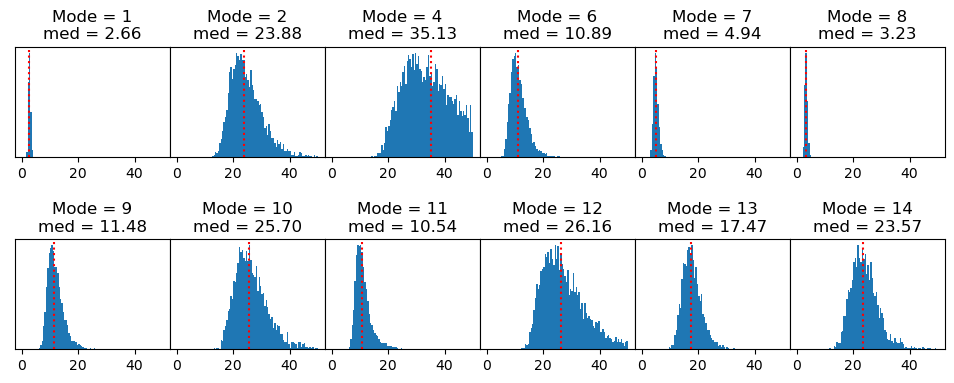

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,4), dpi=100, gridspec_kw={'wspace':0, 'hspace':0.75})
for i in range(len(modes)):
    c,r = i//6, i%6
    axes[c,r].set_title("Mode = %d\nmed = %.2f" %(modes[i],np.median(intensities[i])))
    axes[c,r].hist(intensities[i], range=(0,50), bins=100)
    axes[c,r].axvline(np.median(intensities[i]), ls=':', color='r')
    axes[c,r].set_yticks([])

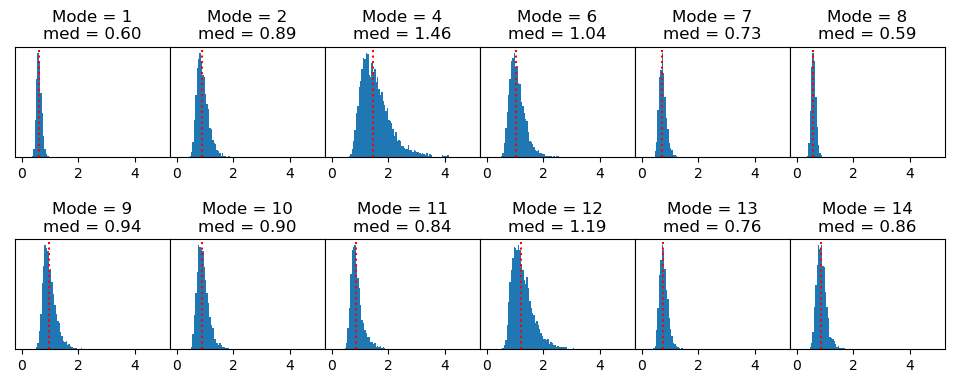

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,4), dpi=100, gridspec_kw={'wspace':0, 'hspace':0.75})
for i in range(len(modes)):
    c,r = i//6, i%6
    axes[c,r].set_title("Mode = %d\nmed = %.2f" %(modes[i],np.median(scaling[i])))
    axes[c,r].hist(scaling[i], range=(0,5), bins=100, density=True)
    axes[c,r].axvline(np.median(scaling[i]), ls=':', color='r')
    axes[c,r].set_yticks([])

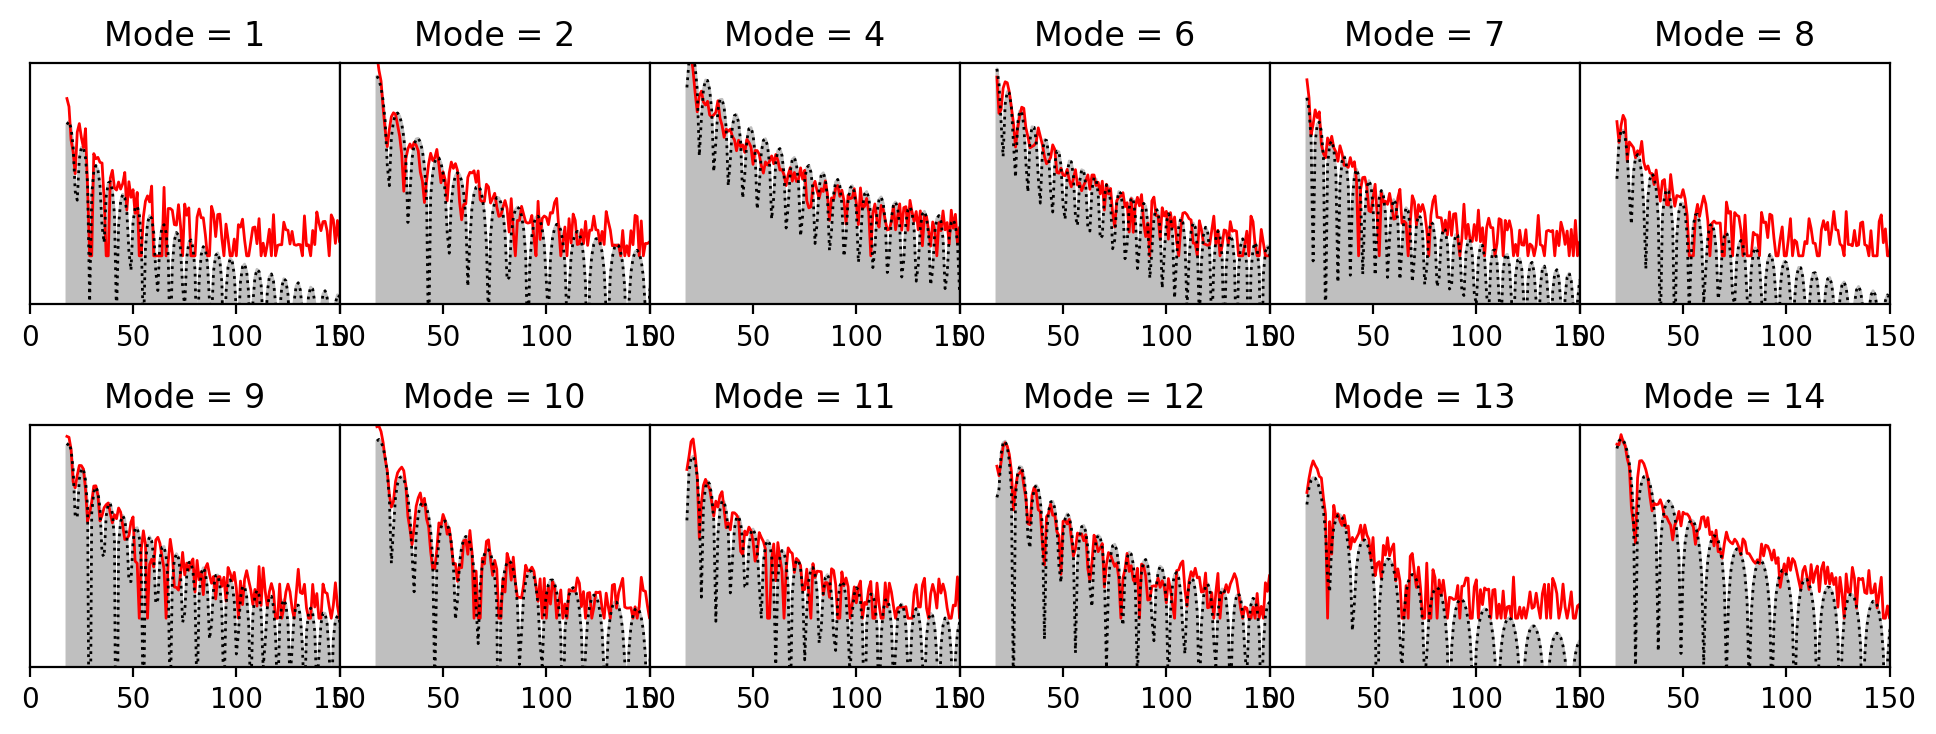

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12,4), dpi=200, gridspec_kw={'wspace':0, 'hspace':0.5})
for i in range(len(modes)):
    c,r = i//6, i%6
    axes[c,r].set_title("Mode = %d" %(modes[i]))
    axes[c,r].plot(qr, rdata[i][:1].mean(axis=0), color='r', lw=1)
    axes[c,r].plot(qr, rfits[i][:1].mean(axis=0), color='k', lw=1, ls=':')
    axes[c,r].fill_between(qr, rfits[i][:1].mean(axis=0), color='0.75', lw=1)
    axes[c,r].semilogy()
    axes[c,r].set_ylim(1e-4,10)
    axes[c,r].set_xlim(0,150)
    axes[c,r].set_yticks([])

In [27]:
[i[:5] for i in intensities]

[array([ 4.40423576,  4.34417192,  4.20376398,  4.1704254 ,  4.15402305]),
 array([ 68.27636769,  63.54944852,  56.18753283,  55.37412828,  53.61012994]),
 array([ 168.53402575,  148.06313576,  137.08036003,  129.03928857,
         122.91097034]),
 array([ 37.0271127 ,  29.7618685 ,  29.24867414,  28.50148077,  28.1004542 ]),
 array([ 9.29562925,  8.97730245,  8.8291238 ,  8.66143006,  8.6523442 ]),
 array([ 5.136995  ,  5.04522443,  4.9792177 ,  4.91560089,  4.89817957]),
 array([ 30.71778429,  29.78505327,  27.97244571,  27.07340739,  26.73804694]),
 array([ 97.48365314,  77.29028126,  63.85699463,  59.14356219,  55.20059029]),
 array([ 29.6986438 ,  27.14328433,  26.40285452,  25.63213933,  25.2309997 ]),
 array([ 79.76998842,  79.35426272,  78.65962704,  76.45968882,  73.10578786]),
 array([ 32.98975178,  32.5136102 ,  32.17729025,  31.14330687,  30.70779221]),
 array([ 148.95895119,   49.32000356,   49.10115449,   47.49767795,
          46.59214477])]

In [34]:
diameter

array([ 116.32726769,   78.68123229,  107.98058978,  126.73834002,
        125.13428257,  106.30579839,  116.59301803,   73.4268536 ,
        105.31900295,  100.78175153,   65.        ,   68.83976976])